In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import copy

In [2]:
#OK, let us start with the graphml file for London's underground

G = nx.read_graphml('london.graphml')

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [5]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [6]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [7]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

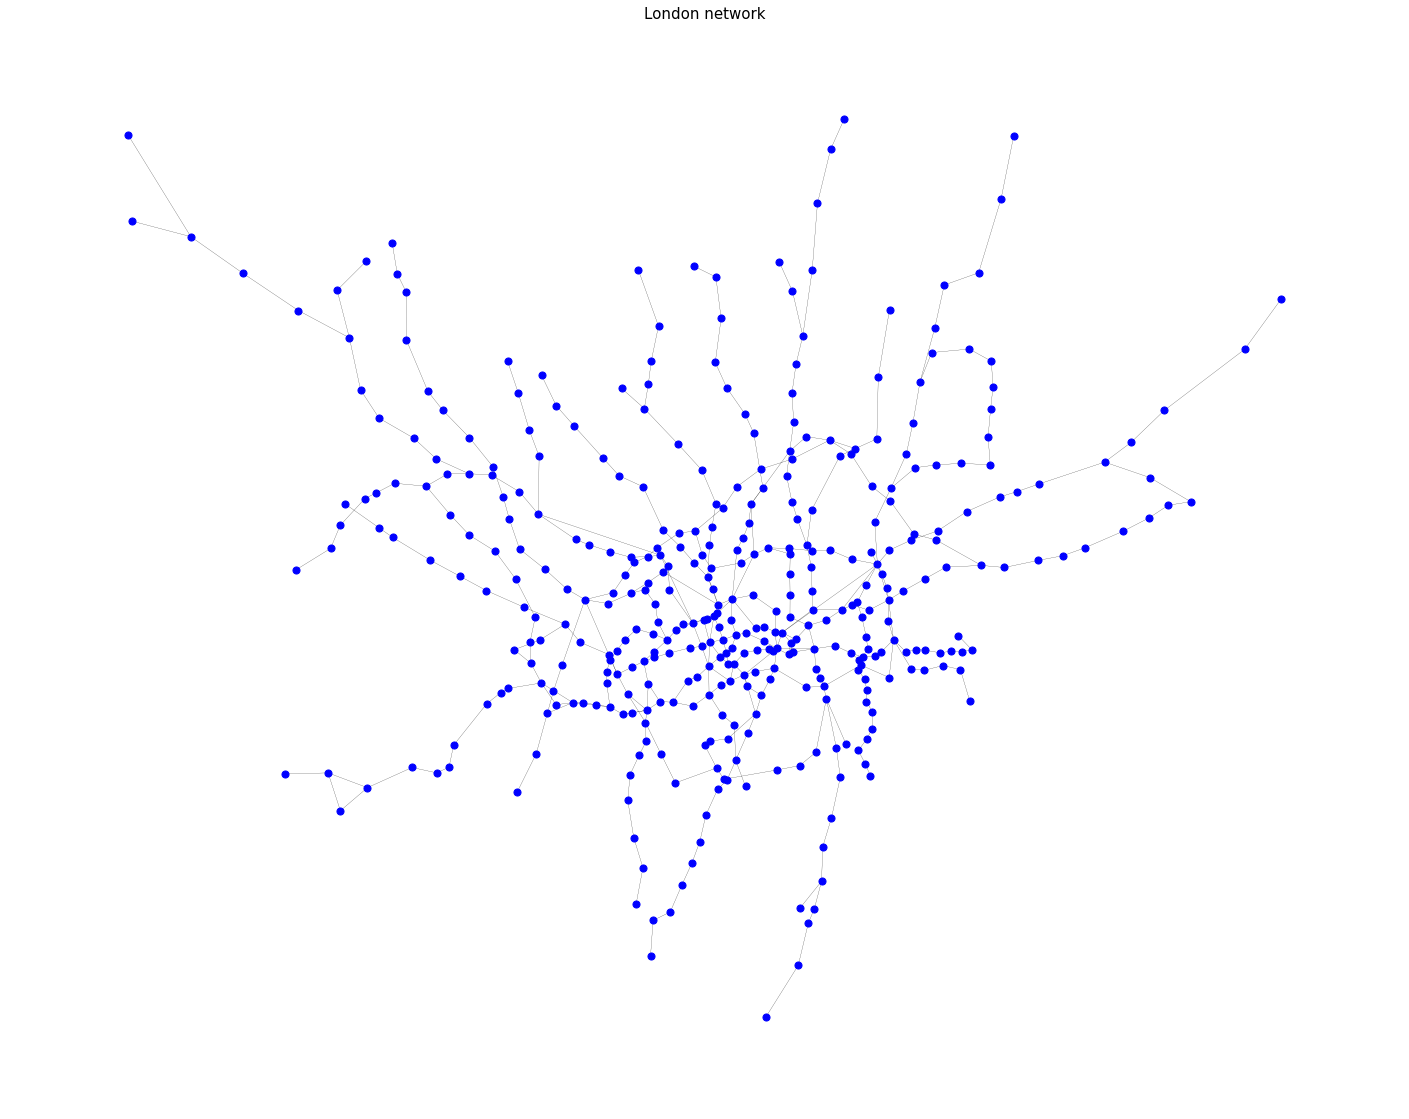

In [8]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'source')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London network",fontsize=15)
plt.axis("off")
plt.show()

In [9]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,flows,line_name
0,Wembley Park,Kingsbury,2916.771558,12356,Jubilee
1,Wembley Park,Neasden,2353.165938,6744,Jubilee
2,Wembley Park,Preston Road,1419.735166,36601,Metropolitan
3,Wembley Park,Finchley Road,7266.373927,55216,Metropolitan
4,Kingsbury,Queensbury,1245.995234,9419,Jubilee
5,Queensbury,Canons Park,1693.307343,6385,Jubilee
6,Canons Park,Stanmore,1419.669476,3624,Jubilee
7,Stratford,West Ham,1673.509515,91801,Jubilee
8,Stratford,Mile End,2805.001392,12010,Central
9,Stratford,Leyton,2131.342926,56082,Central


# 1 Topological network

## 1.1 Centrality measures

### 1.1.1 Degree centrality

In [10]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [11]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_dsorted = df.sort_values(["degree"], ascending=False)
df_dsorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


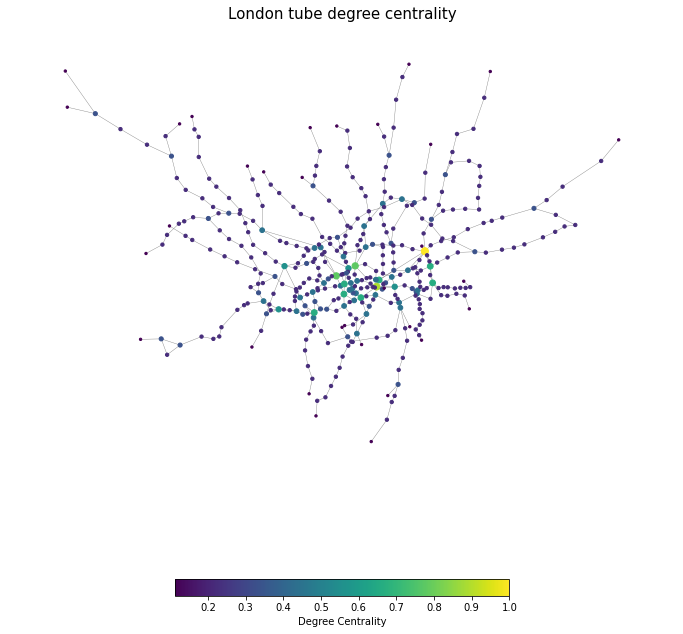

In [12]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

### 1.1.2 Topological betweenness centrality

In [13]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_bsorted = df.sort_values(["betweenness_t"], ascending=False)
df_bsorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


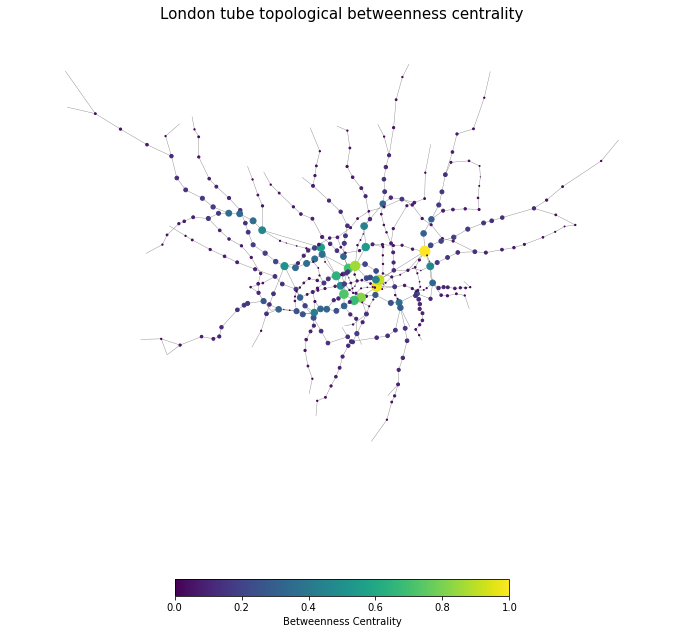

In [14]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

### 1.1.3 Topological closeness centrality

In [15]:
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_csorted = df.sort_values(["closeness_t"], ascending=False)
df_csorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


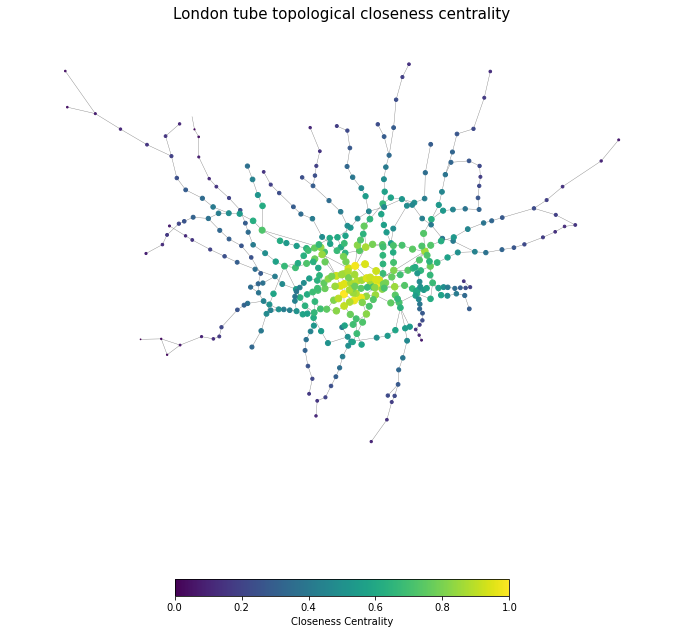

In [16]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

## 1.2 Impact measures

### 1.2.1 Clustering coefficient

In [17]:
# let's measure the clustering coefficient
c = nx.clustering(G)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


### 1.2.2 Average shortest paths

In [18]:
sp=nx.average_shortest_path_length(G)
print(sp)

13.545997506234414


## 1.3 Node Removal

In [19]:
list(G.nodes(data=True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'degree': 0.01,
  'betweenness_t': 10780.813492063491,
  'closeness_t': 0.09465215333648841})

In [20]:
list(G.edges(data=True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

### 1.3.1 Degree centrality

In [21]:
df_dsorted.head(10)

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


#### Non-sequential removal

In [22]:
G_dn=copy.deepcopy(G)

In [23]:
#To remove nodes: 
#If we want to remove the node with the max value of degree centrality:

#maxdn1=[n for n in G_dn.nodes() if G_dn.nodes[n]['degree'] == max(degree_values)]
#maxdn1

In [24]:
# To remove  10 highest values:
# List of nodes:
values_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
dn_ten=[e for e,v in values_sorted[:10]]
dn_ten

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'West Ham',
 'Canning Town',
 'Waterloo',
 'Green Park',
 'Oxford Circus',
 'Liverpool Street']

In [25]:
print(dn_ten[0:1:1])

['Stratford']


In [26]:
# 1st
G_dn.remove_nodes_from(dn_ten[0:1:1])
components_gdn1 = nx.connected_components(G_dn)
largest_component_gdn1 = max(components_gdn1, key=len)
largest_subgraph_gdn1 = G_dn.subgraph(largest_component_gdn1)
largest_subgraph_gdn1.number_of_nodes()

# let's measure the clustering coefficient
cdn1 = nx.clustering(largest_subgraph_gdn1)
cdn1 = sorted(cdn1.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg1 = sum([i[1] for i in cdn1]) / len(cdn1)
print(f'1st avg clustering coefficient: {cdn_avg1}')
spdn1=nx.average_shortest_path_length(largest_subgraph_gdn1)
print(spdn1)

# 2nd
G_dn.remove_nodes_from(dn_ten[1:2:2])
components_gdn2 = nx.connected_components(G_dn)
largest_component_gdn2 = max(components_gdn2, key=len)
largest_subgraph_gdn2 = G_dn.subgraph(largest_component_gdn2)
largest_subgraph_gdn2.number_of_nodes()

# let's measure the clustering coefficient
cdn2 = nx.clustering(largest_subgraph_gdn2)
cdn2 = sorted(cdn2.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg2 = sum([i[1] for i in cdn2]) / len(cdn2)
print(f' 2nd avg clustering coefficient: {cdn_avg2}')
spdn2=nx.average_shortest_path_length(largest_subgraph_gdn2)
print(spdn2)

# 3rd
G_dn.remove_nodes_from(dn_ten[2:3:3])
# To obtain the largest component as a new graph: 
components_gdn3 = nx.connected_components(G_dn)
largest_component_gdn3 = max(components_gdn3, key=len)
largest_subgraph_gdn3 = G_dn.subgraph(largest_component_gdn3)
largest_subgraph_gdn3.number_of_nodes()

# let's measure the clustering coefficient
cdn3 = nx.clustering(largest_subgraph_gdn3)
cdn3 = sorted(cdn3.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg3 = sum([i[1] for i in cdn3]) / len(cdn3)
print(f'3rd avg clustering coefficient: {cdn_avg3}')
spdn3=nx.average_shortest_path_length(largest_subgraph_gdn3)
print(spdn3)

# 4th
G_dn.remove_nodes_from(dn_ten[3:4:4])
# To obtain the largest component as a new graph: 
components_gdn4 = nx.connected_components(G_dn)
largest_component_gdn4 = max(components_gdn4, key=len)
largest_subgraph_gdn4 = G_dn.subgraph(largest_component_gdn4)
largest_subgraph_gdn4.number_of_nodes()

# let's measure the clustering coefficient
cdn4 = nx.clustering(largest_subgraph_gdn4)
cdn4 = sorted(cdn4.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg4 = sum([i[1] for i in cdn4]) / len(cdn4)
print(f'4th avg clustering coefficient: {cdn_avg4}')
spdn4=nx.average_shortest_path_length(largest_subgraph_gdn4)
print(spdn4)

# 5th
G_dn.remove_nodes_from(dn_ten[4:5:5])
# To obtain the largest component as a new graph: 
components_gdn5 = nx.connected_components(G_dn)
largest_component_gdn5 = max(components_gdn5, key=len)
largest_subgraph_gdn5 = G_dn.subgraph(largest_component_gdn5)
largest_subgraph_gdn5.number_of_nodes()

# let's measure the clustering coefficient
cdn5 = nx.clustering(largest_subgraph_gdn5)
cdn5 = sorted(cdn5.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg5 = sum([i[1] for i in cdn5]) / len(cdn5)
print(f'5th avg clustering coefficient: {cdn_avg5}')
spdn5=nx.average_shortest_path_length(largest_subgraph_gdn5)
print(spdn5)

# 6th
G_dn.remove_nodes_from(dn_ten[5:6:6])
# To obtain the largest component as a new graph: 
components_gdn6 = nx.connected_components(G_dn)
largest_component_gdn6 = max(components_gdn6, key=len)
largest_subgraph_gdn6 = G_dn.subgraph(largest_component_gdn6)
largest_subgraph_gdn6.number_of_nodes()

# let's measure the clustering coefficient
cdn6 = nx.clustering(largest_subgraph_gdn6)
cdn6 = sorted(cdn6.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg6 = sum([i[1] for i in cdn6]) / len(cdn6)
print(f'6th avg clustering coefficient: {cdn_avg6}')
spdn6=nx.average_shortest_path_length(largest_subgraph_gdn6)
print(spdn6)

# 7th
G_dn.remove_nodes_from(dn_ten[6:7:7])
# To obtain the largest component as a new graph: 
components_gdn7 = nx.connected_components(G_dn)
largest_component_gdn7 = max(components_gdn7, key=len)
largest_subgraph_gdn7 = G_dn.subgraph(largest_component_gdn7)
largest_subgraph_gdn7.number_of_nodes()

# let's measure the clustering coefficient
cdn7 = nx.clustering(largest_subgraph_gdn7)
cdn7 = sorted(cdn7.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg7 = sum([i[1] for i in cdn7]) / len(cdn7)
print(f'7th avg clustering coefficient: {cdn_avg7}')
spdn7=nx.average_shortest_path_length(largest_subgraph_gdn7)
print(spdn7)

# 8th
G_dn.remove_nodes_from(dn_ten[7:8:8])
# To obtain the largest component as a new graph: 
components_gdn8 = nx.connected_components(G_dn)
largest_component_gdn8 = max(components_gdn8, key=len)
largest_subgraph_gdn8 = G_dn.subgraph(largest_component_gdn8)
largest_subgraph_gdn8.number_of_nodes()

# let's measure the clustering coefficient
cdn8 = nx.clustering(largest_subgraph_gdn8)
cdn8 = sorted(cdn8.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg8 = sum([i[1] for i in cdn8]) / len(cdn8)
print(f'8th avg clustering coefficient: {cdn_avg8}')
spdn8=nx.average_shortest_path_length(largest_subgraph_gdn8)
print(spdn8)

# 9th
G_dn.remove_nodes_from(dn_ten[8:9:9])
# To obtain the largest component as a new graph: 
components_gdn9 = nx.connected_components(G_dn)
largest_component_gdn9 = max(components_gdn9, key=len)
largest_subgraph_gdn9 = G_dn.subgraph(largest_component_gdn9)
largest_subgraph_gdn9.number_of_nodes()

# let's measure the clustering coefficient
cdn9 = nx.clustering(largest_subgraph_gdn9)
cdn9 = sorted(cdn9.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg9 = sum([i[1] for i in cdn9]) / len(cdn9)
print(f'9th avg clustering coefficient: {cdn_avg9}')
spdn9=nx.average_shortest_path_length(largest_subgraph_gdn9)
print(spdn9)

# 10th
G_dn.remove_nodes_from(dn_ten[9:10:10])
# To obtain the largest component as a new graph: 
components_gdn10 = nx.connected_components(G_dn)
largest_component_gdn10 = max(components_gdn10, key=len)
largest_subgraph_gdn10 = G_dn.subgraph(largest_component_gdn10)
largest_subgraph_gdn10.number_of_nodes()

# let's measure the clustering coefficient
cdn10 = nx.clustering(largest_subgraph_gdn10)
cdn10 = sorted(cdn10.items(), key=lambda pair: pair[1], reverse=True)
cdn_avg10 = sum([i[1] for i in cdn10]) / len(cdn10)
print(f'10th avg clustering coefficient: {cdn_avg10}')
spdn10=nx.average_shortest_path_length(largest_subgraph_gdn10)
print(spdn10)

1st avg clustering coefficient: 0.03232189973614774
14.496447069006436
 2nd avg clustering coefficient: 0.031695641219450725
14.872496596634528
3rd avg clustering coefficient: 0.02855879752431474
15.686438286585021
4th avg clustering coefficient: 0.028966131907308353
17.013376152313228
5th avg clustering coefficient: 0.026055705300988295
17.853835506665696
6th avg clustering coefficient: 0.02715355805243443
17.69335337869916
7th avg clustering coefficient: 0.02600938967136148
18.139508235855814
8th avg clustering coefficient: 0.02438794726930319
18.344520734303227
9th avg clustering coefficient: 0.026420454545454528
18.419159544159545
10th avg clustering coefficient: 0.02687861271676299
18.40477506911284


#### Sequential removal

In [27]:
G_ds=copy.deepcopy(G)

In [28]:
# 10 highest values:
# List of nodes:
values_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
dn_ten=[e for e,v in values_sorted[:10]]
dn_ten

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'West Ham',
 'Canning Town',
 'Waterloo',
 'Green Park',
 'Oxford Circus',
 'Liverpool Street']

In [29]:
# 1 remove 1st node
G_ds.remove_nodes_from(dn_ten[0:1:1])
components_gds0 = nx.connected_components(G_ds)
largest_component_gds0 = max(components_gds0, key=len)
largest_subgraph_gds0 = G_ds.subgraph(largest_component_gds0)
largest_subgraph_gds0.number_of_nodes()

# two measures
cds0 = nx.clustering(largest_subgraph_gds0)
cds0 = sorted(cds0.items(), key=lambda pair: pair[1], reverse=True)
cds_avg0 = sum([i[1] for i in cds0]) / len(cds0)
print(f'1st avg clustering coefficient: {cds_avg0}')
spds0=nx.average_shortest_path_length(largest_subgraph_gds0)
print(spds0)

for m in range(2, 11):
  print(m)
  # 2 re-compute centrality
  lds =nx.degree_centrality(G_ds)
  nx.set_node_attributes(G_ds,dict(lds),'degree')
  # To dataframe using the nodes as the index
  lds_df = pd.DataFrame(index=G_ds.nodes())
  lds_df['degree'] = pd.Series(nx.get_node_attributes(G_ds, 'degree'))

  # 10 highest values in new centrality:
  df_dssorted = lds_df.sort_values(['degree'], ascending=False)

  # List of nodes:
  dsvalues_sorted = sorted(lds.items(), key=itemgetter(1), reverse=True)
  ds_ten=[e for e,v in dsvalues_sorted[:10]]

  # remove 1st node in new
  G_ds.remove_nodes_from(ds_ten[0:1:1])
  components_gds = nx.connected_components(G_ds)
  largest_component_gds = max(components_gds, key=len)
  largest_subgraph_gds = G_ds.subgraph(largest_component_gds)
  largest_subgraph_gds.number_of_nodes()

  # two measures
  cds = nx.clustering(largest_subgraph_gds)
  cds = sorted(cds.items(), key=lambda pair: pair[1], reverse=True)
  cds_avg = sum([i[1] for i in cds]) / len(cds)
  print(f'{m}st avg clustering coefficient: {cds_avg}')
  spds=nx.average_shortest_path_length(largest_subgraph_gds)
  print(spds)

1st avg clustering coefficient: 0.03232189973614774
14.496447069006436
2
2st avg clustering coefficient: 0.031695641219450725
14.872496596634528
3
3st avg clustering coefficient: 0.02855879752431474
15.686438286585021
4
4st avg clustering coefficient: 0.028966131907308353
17.013376152313228
5
5st avg clustering coefficient: 0.026851851851851825
17.37607551841535
6
6st avg clustering coefficient: 0.025719591457752995
17.531099733897697
7
7st avg clustering coefficient: 0.018249534450651767
17.894731076788258
8
8st avg clustering coefficient: 0.01661998132586368
18.493500771094954
9
9st avg clustering coefficient: 0.018591549295774647
18.5749661812684
10
10st avg clustering coefficient: 0.019354838709677417
21.207348628601


### 1.3.2 betweenness centrality

In [30]:
df_bsorted.head(10)

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


#### Non-sequential removal

In [31]:
G_bn=copy.deepcopy(G)

In [32]:
# 10 highest values:
# List of nodes:
bn_values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
bn_ten=[e for e,v in bn_values_sorted[:10]]
bn_ten

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [33]:
# 1st
G_bn.remove_nodes_from(bn_ten[0:1:1])
components_gbn1 = nx.connected_components(G_bn)
largest_component_gbn1 = max(components_gbn1, key=len)
largest_subgraph_gbn1 = G_bn.subgraph(largest_component_gbn1)
largest_subgraph_gbn1.number_of_nodes()

# let's measure the clustering coefficient
cbn1 = nx.clustering(largest_subgraph_gbn1)
cbn1 = sorted(cbn1.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg1 = sum([i[1] for i in cbn1]) / len(cbn1)
print(f'1st avg clustering coefficient: {cbn_avg1}')
spbn1=nx.average_shortest_path_length(largest_subgraph_gbn1)
print(spbn1)

# 2nd
G_bn.remove_nodes_from(bn_ten[1:2:2])
components_gbn2 = nx.connected_components(G_bn)
largest_component_gbn2 = max(components_gbn2, key=len)
largest_subgraph_gbn2 = G_bn.subgraph(largest_component_gbn2)
largest_subgraph_gbn2.number_of_nodes()

# let's measure the clustering coefficient
cbn2 = nx.clustering(largest_subgraph_gbn2)
cbn2 = sorted(cbn2.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg2 = sum([i[1] for i in cbn2]) / len(cbn2)
print(f' 2nd avg clustering coefficient: {cbn_avg2}')
spbn2=nx.average_shortest_path_length(largest_subgraph_gbn2)
print(spbn2)

# 3rd
G_bn.remove_nodes_from(bn_ten[2:3:3])
# To obtain the largest component as a new graph: 
components_gbn3 = nx.connected_components(G_bn)
largest_component_gbn3 = max(components_gbn3, key=len)
largest_subgraph_gbn3 = G_bn.subgraph(largest_component_gbn3)
largest_subgraph_gbn3.number_of_nodes()

# let's measure the clustering coefficient
cbn3 = nx.clustering(largest_subgraph_gbn3)
cbn3 = sorted(cbn3.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg3 = sum([i[1] for i in cbn3]) / len(cbn3)
print(f'3rd avg clustering coefficient: {cbn_avg3}')
spbn3=nx.average_shortest_path_length(largest_subgraph_gbn3)
print(spbn3)

# 4th
G_bn.remove_nodes_from(bn_ten[3:4:4])
# To obtain the largest component as a new graph: 
components_gbn4 = nx.connected_components(G_bn)
largest_component_gbn4 = max(components_gbn4, key=len)
largest_subgraph_gbn4 = G_bn.subgraph(largest_component_gbn4)
largest_subgraph_gbn4.number_of_nodes()

# let's measure the clustering coefficient
cbn4 = nx.clustering(largest_subgraph_gbn4)
cbn4 = sorted(cbn4.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg4 = sum([i[1] for i in cbn4]) / len(cbn4)
print(f'4th avg clustering coefficient: {cbn_avg4}')
spbn4=nx.average_shortest_path_length(largest_subgraph_gbn4)
print(spbn4)

# 5th
G_bn.remove_nodes_from(bn_ten[4:5:5])
# To obtain the largest component as a new graph: 
components_gbn5 = nx.connected_components(G_bn)
largest_component_gbn5 = max(components_gbn5, key=len)
largest_subgraph_gbn5 = G_bn.subgraph(largest_component_gbn5)
largest_subgraph_gbn5.number_of_nodes()

# let's measure the clustering coefficient
cbn5 = nx.clustering(largest_subgraph_gbn5)
cbn5 = sorted(cbn5.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg5 = sum([i[1] for i in cbn5]) / len(cbn5)
print(f'5th avg clustering coefficient: {cbn_avg5}')
spbn5=nx.average_shortest_path_length(largest_subgraph_gbn5)
print(spbn5)

# 6th
G_bn.remove_nodes_from(bn_ten[5:6:6])
# To obtain the largest component as a new graph: 
components_gbn6 = nx.connected_components(G_bn)
largest_component_gbn6 = max(components_gbn6, key=len)
largest_subgraph_gbn6 = G_bn.subgraph(largest_component_gbn6)
largest_subgraph_gbn6.number_of_nodes()

# let's measure the clustering coefficient
cbn6 = nx.clustering(largest_subgraph_gbn6)
cbn6 = sorted(cbn6.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg6 = sum([i[1] for i in cbn6]) / len(cbn6)
print(f'6th avg clustering coefficient: {cbn_avg6}')
spbn6=nx.average_shortest_path_length(largest_subgraph_gbn6)
print(spbn6)

# 7th
G_bn.remove_nodes_from(bn_ten[6:7:7])
# To obtain the largest component as a new graph: 
components_gbn7 = nx.connected_components(G_bn)
largest_component_gbn7 = max(components_gbn7, key=len)
largest_subgraph_gbn7 = G_bn.subgraph(largest_component_gbn7)
largest_subgraph_gbn7.number_of_nodes()

# let's measure the clustering coefficient
cbn7 = nx.clustering(largest_subgraph_gbn7)
cbn7 = sorted(cbn7.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg7 = sum([i[1] for i in cbn7]) / len(cbn7)
print(f'7th avg clustering coefficient: {cbn_avg7}')
spbn7=nx.average_shortest_path_length(largest_subgraph_gbn7)
print(spbn7)

# 8th
G_bn.remove_nodes_from(bn_ten[7:8:8])
# To obtain the largest component as a new graph: 
components_gbn8 = nx.connected_components(G_bn)
largest_component_gbn8 = max(components_gbn8, key=len)
largest_subgraph_gbn8 = G_bn.subgraph(largest_component_gbn8)
largest_subgraph_gbn8.number_of_nodes()

# let's measure the clustering coefficient
cbn8 = nx.clustering(largest_subgraph_gbn8)
cbn8 = sorted(cbn8.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg8 = sum([i[1] for i in cbn8]) / len(cbn8)
print(f'8th avg clustering coefficient: {cbn_avg8}')
spbn8=nx.average_shortest_path_length(largest_subgraph_gbn8)
print(spbn8)

# 9th
G_bn.remove_nodes_from(bn_ten[8:9:9])
# To obtain the largest component as a new graph: 
components_gbn9 = nx.connected_components(G_bn)
largest_component_gbn9 = max(components_gbn9, key=len)
largest_subgraph_gbn9 = G_bn.subgraph(largest_component_gbn9)
largest_subgraph_gbn9.number_of_nodes()

# let's measure the clustering coefficient
cbn9 = nx.clustering(largest_subgraph_gbn9)
cbn9 = sorted(cbn9.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg9 = sum([i[1] for i in cbn9]) / len(cbn9)
print(f'9th avg clustering coefficient: {cbn_avg9}')
spbn9=nx.average_shortest_path_length(largest_subgraph_gbn9)
print(spbn9)

# 10th
G_bn.remove_nodes_from(bn_ten[9:10:10])
# To obtain the largest component as a new graph: 
components_gbn10 = nx.connected_components(G_bn)
largest_component_gbn10 = max(components_gbn10, key=len)
largest_subgraph_gbn10 = G_bn.subgraph(largest_component_gbn10)
largest_subgraph_gbn10.number_of_nodes()

# let's measure the clustering coefficient
cbn10 = nx.clustering(largest_subgraph_gbn10)
cbn10 = sorted(cbn10.items(), key=lambda pair: pair[1], reverse=True)
cbn_avg10 = sum([i[1] for i in cbn10]) / len(cbn10)
print(f'10th avg clustering coefficient: {cbn_avg10}')
spbn10=nx.average_shortest_path_length(largest_subgraph_gbn10)
print(spbn10)

1st avg clustering coefficient: 0.03232189973614774
14.496447069006436
 2nd avg clustering coefficient: 0.031695641219450725
14.872496596634528
3rd avg clustering coefficient: 0.03177971453833521
15.03120943619843
4th avg clustering coefficient: 0.03247336670517262
16.030742332629124
5th avg clustering coefficient: 0.03138996138996138
16.75674210796162
6th avg clustering coefficient: 0.030300683959220535
17.18086485212678
7th avg clustering coefficient: 0.028461326727222663
16.80737203652509
8th avg clustering coefficient: 0.028543823326432002
16.97505898213684
9th avg clustering coefficient: 0.024756335282651063
17.5863387697004
10th avg clustering coefficient: 0.02497541789577187
17.986978757571


#### Sequential removal

In [34]:
G_bs=copy.deepcopy(G)

In [35]:
# 10 highest values:
# List of nodes:
bn_values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
bn_ten=[e for e,v in bn_values_sorted[:10]]
bn_ten

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [36]:
# 1 remove 1st node
G_bs.remove_nodes_from(bn_ten[0:1:1])
components_gbs0 = nx.connected_components(G_bs)
largest_component_gbs0 = max(components_gbs0, key=len)
largest_subgraph_gbs0 = G_bs.subgraph(largest_component_gbs0)
largest_subgraph_gbs0.number_of_nodes()

# two measures
cbs0 = nx.clustering(largest_subgraph_gbs0)
cbs0 = sorted(cbs0.items(), key=lambda pair: pair[1], reverse=True)
cbs_avg0 = sum([i[1] for i in cbs0]) / len(cbs0)
print(f'1st avg clustering coefficient: {cbs_avg0}')
spbs0=nx.average_shortest_path_length(largest_subgraph_gbs0)
print(spbs0)

for d in range(2, 11):
  print(d)
  # 2 re-compute centrality
  lbs =nx.betweenness_centrality(G_bs)
  nx.set_node_attributes(G_bs,dict(lbs),'betweenness_t')
  # To dataframe using the nodes as the index
  lbs_df = pd.DataFrame(index=G_bs.nodes())
  lbs_df['betweenness_t'] = pd.Series(nx.get_node_attributes(G_bs, 'betweenness_t'))

  # 10 highest values in new centrality:
  df_bssorted = lbs_df.sort_values(['betweenness_t'], ascending=False)

  # List of nodes:
  bsvalues_sorted = sorted(lbs.items(), key=itemgetter(1), reverse=True)
  bs_ten=[e for e,v in bsvalues_sorted[:10]]

  # remove 1st node in new
  G_bs.remove_nodes_from(bs_ten[0:1:1])
  components_gbs = nx.connected_components(G_bs)
  largest_component_gbs = max(components_gbs, key=len)
  largest_subgraph_gbs = G_bs.subgraph(largest_component_gbs)
  largest_subgraph_gbs.number_of_nodes()

  # two measures
  cbs = nx.clustering(largest_subgraph_gbs)
  cbs = sorted(cbs.items(), key=lambda pair: pair[1], reverse=True)
  cbs_avg = sum([i[1] for i in cbs]) / len(cbs)
  print(f'{d}st avg clustering coefficient: {cbs_avg}')
  spbs=nx.average_shortest_path_length(largest_subgraph_gbs)
  print(spbs)

1st avg clustering coefficient: 0.03232189973614774
14.496447069006436
2
2st avg clustering coefficient: 0.0325837742504409
15.31013431013431
3
3st avg clustering coefficient: 0.03164077302008335
15.795939387098596
4
4st avg clustering coefficient: 0.03088905775075986
16.789631205673757
5
5st avg clustering coefficient: 0.030971428571428556
19.02923351158645
6
6st avg clustering coefficient: 0.04235368156072999
13.4623601419048
7
7st avg clustering coefficient: 0.030594184576485463
14.20645034414946
8
8st avg clustering coefficient: 0.03527696793002916
13.792046049188906
9
9st avg clustering coefficient: 0.0322598403523259
13.821884661916924
10
10st avg clustering coefficient: 0.02568627450980393
18.193595544726765


### 1.3.3 Closeness centrality

In [37]:
df_csorted.head(10)

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


#### Non-sequential removal

In [38]:
G_cn=copy.deepcopy(G)

In [39]:
# 10 highest values:
# List of nodes:
cn_values_sorted = sorted(clos_t.items(), key=itemgetter(1), reverse=True)
cn_ten=[e for e,v in cn_values_sorted[:10]]
cn_ten

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

In [40]:
# 1st
G_cn.remove_nodes_from(cn_ten[0:1:1])
components_gcn1 = nx.connected_components(G_cn)
largest_component_gcn1 = max(components_gcn1, key=len)
largest_subgraph_gcn1 = G_cn.subgraph(largest_component_gcn1)
largest_subgraph_gcn1.number_of_nodes()

# let's measure the clustering coefficient
ccn1 = nx.clustering(largest_subgraph_gcn1)
ccn1 = sorted(ccn1.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg1 = sum([i[1] for i in ccn1]) / len(ccn1)
print(f'1st avg clustering coefficient: {ccn_avg1}')
spcn1=nx.average_shortest_path_length(largest_subgraph_gcn1)
print(spcn1)

# 2nd
G_cn.remove_nodes_from(cn_ten[1:2:2])
components_gcn2 = nx.connected_components(G_cn)
largest_component_gcn2 = max(components_gcn2, key=len)
largest_subgraph_gcn2 = G_cn.subgraph(largest_component_gcn2)
largest_subgraph_gcn2.number_of_nodes()

# let's measure the clustering coefficient
ccn2 = nx.clustering(largest_subgraph_gcn2)
ccn2 = sorted(ccn2.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg2 = sum([i[1] for i in ccn2]) / len(ccn2)
print(f' 2nd avg clustering coefficient: {ccn_avg2}')
spcn2=nx.average_shortest_path_length(largest_subgraph_gcn2)
print(spcn2)

# 3rd
G_cn.remove_nodes_from(cn_ten[2:3:3])
# To obtain the largest component as a new graph: 
components_gcn3 = nx.connected_components(G_cn)
largest_component_gcn3 = max(components_gcn3, key=len)
largest_subgraph_gcn3 = G_cn.subgraph(largest_component_gcn3)
largest_subgraph_gcn3.number_of_nodes()

# let's measure the clustering coefficient
ccn3 = nx.clustering(largest_subgraph_gcn3)
ccn3 = sorted(ccn3.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg3 = sum([i[1] for i in ccn3]) / len(ccn3)
print(f'3rd avg clustering coefficient: {ccn_avg3}')
spcn3=nx.average_shortest_path_length(largest_subgraph_gcn3)
print(spcn3)

# 4th
G_cn.remove_nodes_from(cn_ten[3:4:4])
# To obtain the largest component as a new graph: 
components_gcn4 = nx.connected_components(G_cn)
largest_component_gcn4 = max(components_gcn4, key=len)
largest_subgraph_gcn4 = G_cn.subgraph(largest_component_gcn4)
largest_subgraph_gcn4.number_of_nodes()

# let's measure the clustering coefficient
ccn4 = nx.clustering(largest_subgraph_gcn4)
ccn4 = sorted(ccn4.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg4 = sum([i[1] for i in ccn4]) / len(ccn4)
print(f'4th avg clustering coefficient: {ccn_avg4}')
spcn4=nx.average_shortest_path_length(largest_subgraph_gcn4)
print(spcn4)

# 5th
G_cn.remove_nodes_from(cn_ten[4:5:5])
# To obtain the largest component as a new graph: 
components_gcn5 = nx.connected_components(G_cn)
largest_component_gcn5 = max(components_gcn5, key=len)
largest_subgraph_gcn5 = G_cn.subgraph(largest_component_gcn5)
largest_subgraph_gcn5.number_of_nodes()

# let's measure the clustering coefficient
ccn5 = nx.clustering(largest_subgraph_gcn5)
ccn5 = sorted(ccn5.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg5 = sum([i[1] for i in ccn5]) / len(ccn5)
print(f'5th avg clustering coefficient: {ccn_avg5}')
spcn5=nx.average_shortest_path_length(largest_subgraph_gcn5)
print(spcn5)

# 6th
G_cn.remove_nodes_from(cn_ten[5:6:6])
# To obtain the largest component as a new graph: 
components_gcn6 = nx.connected_components(G_cn)
largest_component_gcn6 = max(components_gcn6, key=len)
largest_subgraph_gcn6 = G_cn.subgraph(largest_component_gcn6)
largest_subgraph_gcn6.number_of_nodes()

# let's measure the clustering coefficient
ccn6 = nx.clustering(largest_subgraph_gcn6)
ccn6 = sorted(ccn6.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg6 = sum([i[1] for i in ccn6]) / len(ccn6)
print(f'6th avg clustering coefficient: {ccn_avg6}')
spcn6=nx.average_shortest_path_length(largest_subgraph_gcn6)
print(spcn6)

# 7th
G_cn.remove_nodes_from(cn_ten[6:7:7])
# To obtain the largest component as a new graph: 
components_gcn7 = nx.connected_components(G_cn)
largest_component_gcn7 = max(components_gcn7, key=len)
largest_subgraph_gcn7 = G_cn.subgraph(largest_component_gcn7)
largest_subgraph_gcn7.number_of_nodes()

# let's measure the clustering coefficient
ccn7 = nx.clustering(largest_subgraph_gcn7)
ccn7 = sorted(ccn7.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg7 = sum([i[1] for i in ccn7]) / len(ccn7)
print(f'7th avg clustering coefficient: {ccn_avg7}')
spcn7=nx.average_shortest_path_length(largest_subgraph_gcn7)
print(spcn7)

# 8th
G_cn.remove_nodes_from(cn_ten[7:8:8])
# To obtain the largest component as a new graph: 
components_gcn8 = nx.connected_components(G_cn)
largest_component_gcn8 = max(components_gcn8, key=len)
largest_subgraph_gcn8 = G_cn.subgraph(largest_component_gcn8)
largest_subgraph_gcn8.number_of_nodes()

# let's measure the clustering coefficient
ccn8 = nx.clustering(largest_subgraph_gcn8)
ccn8 = sorted(ccn8.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg8 = sum([i[1] for i in ccn8]) / len(ccn8)
print(f'8th avg clustering coefficient: {ccn_avg8}')
spcn8=nx.average_shortest_path_length(largest_subgraph_gcn8)
print(spcn8)

# 9th
G_cn.remove_nodes_from(cn_ten[8:9:9])
# To obtain the largest component as a new graph: 
components_gcn9 = nx.connected_components(G_cn)
largest_component_gcn9 = max(components_gcn9, key=len)
largest_subgraph_gcn9 = G_cn.subgraph(largest_component_gcn9)
largest_subgraph_gcn9.number_of_nodes()

# let's measure the clustering coefficient
ccn9 = nx.clustering(largest_subgraph_gcn9)
ccn9 = sorted(ccn9.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg9 = sum([i[1] for i in ccn9]) / len(ccn9)
print(f'9th avg clustering coefficient: {ccn_avg9}')
spcn9=nx.average_shortest_path_length(largest_subgraph_gcn9)
print(spcn9)

# 10th
G_cn.remove_nodes_from(cn_ten[9:10:10])
# To obtain the largest component as a new graph: 
components_gcn10 = nx.connected_components(G_cn)
largest_component_gcn10 = max(components_gcn10, key=len)
largest_subgraph_gcn10 = G_cn.subgraph(largest_component_gcn10)
largest_subgraph_gcn10.number_of_nodes()

# let's measure the clustering coefficient
ccn10 = nx.clustering(largest_subgraph_gcn10)
ccn10 = sorted(ccn10.items(), key=lambda pair: pair[1], reverse=True)
ccn_avg10 = sum([i[1] for i in ccn10]) / len(ccn10)
print(f'10th avg clustering coefficient: {ccn_avg10}')
spcn10=nx.average_shortest_path_length(largest_subgraph_gcn10)
print(spcn10)

1st avg clustering coefficient: 0.029791666666666657
13.82453634085213
 2nd avg clustering coefficient: 0.029275569877073627
14.382728177226987
3rd avg clustering coefficient: 0.02951663077291217
15.98377276812273
4th avg clustering coefficient: 0.028079644956219254
16.080248327099714
5th avg clustering coefficient: 0.02815055315055314
16.855721774709117
6th avg clustering coefficient: 0.02990958408679927
17.43183190901497
7th avg clustering coefficient: 0.030033840947546523
17.464266800997144
8th avg clustering coefficient: 0.030110262934690407
17.462494157968532
9th avg clustering coefficient: 0.030187074829931965
17.460527689336605
10th avg clustering coefficient: 0.030419880034275915
17.47392203111335


#### Sequential removal

In [41]:
G_cs=copy.deepcopy(G)

In [42]:
len(G_cs.nodes)

401

In [43]:
print(cn_ten[0:1:1])

['Green Park']


In [44]:
# 1 remove 1st node
G_cs.remove_nodes_from(cn_ten[0:1:1])
components_gcs0 = nx.connected_components(G_cs)
largest_component_gcs0 = max(components_gcs0, key=len)
largest_subgraph_gcs0 = G_cs.subgraph(largest_component_gcs0)
largest_subgraph_gcs0.number_of_nodes()

# two measures
ccs0 = nx.clustering(largest_subgraph_gcs0)
ccs0 = sorted(ccs0.items(), key=lambda pair: pair[1], reverse=True)
ccs_avg0 = sum([i[1] for i in ccs0]) / len(ccs0)
print(f'1st avg clustering coefficient: {ccs_avg0}')
spcs0=nx.average_shortest_path_length(largest_subgraph_gcs0)
print(spcs0)

for times in range(2, 11):
  print(times)
  # 2 re-compute centrality
  lcs =nx.closeness_centrality(G_cs)
  nx.set_node_attributes(G_cs,dict(lcs),'closeness_t')
  # To dataframe using the nodes as the index
  lcs_df = pd.DataFrame(index=G_cs.nodes())
  lcs_df['closeness_t'] = pd.Series(nx.get_node_attributes(G_cs, 'closeness_t'))

  # 10 highest values in new centrality:
  df_cssorted = lcs_df.sort_values(['closeness_t'], ascending=False)

  # List of nodes:
  csvalues_sorted = sorted(lcs.items(), key=itemgetter(1), reverse=True)
  cs_ten=[e for e,v in csvalues_sorted[:10]]

  # remove 1st node in new
  G_cs.remove_nodes_from(cs_ten[0:1:1])
  components_gcs = nx.connected_components(G_cs)
  largest_component_gcs = max(components_gcs, key=len)
  largest_subgraph_gcs = G_cs.subgraph(largest_component_gcs)
  largest_subgraph_gcs.number_of_nodes()

  # two measures
  ccs = nx.clustering(largest_subgraph_gcs)
  ccs = sorted(ccs.items(), key=lambda pair: pair[1], reverse=True)
  ccs_avg = sum([i[1] for i in ccs]) / len(ccs)
  print(f'{times}st avg clustering coefficient: {ccs_avg}')
  spcs=nx.average_shortest_path_length(largest_subgraph_gcs)
  print(spcs)

1st avg clustering coefficient: 0.029791666666666657
13.82453634085213
2
2st avg clustering coefficient: 0.030033416875522127
14.65848037178373
3
3st avg clustering coefficient: 0.028715003589375437
15.114818424616786
4
4st avg clustering coefficient: 0.028079644956219254
16.70242729562629
5
5st avg clustering coefficient: 0.02815055315055314
18.974696330392533
6
6st avg clustering coefficient: 0.04062368310155918
13.978013765978368
7
7st avg clustering coefficient: 0.04062368310155918
13.978013765978368
8
8st avg clustering coefficient: 0.0288042328042328
14.729722222222222
9
9st avg clustering coefficient: 0.03323565323565323
14.747607718741738
10
10st avg clustering coefficient: 0.0368433971526755
15.661877036483094


### 1.3.4 Plot

#### Non-Sequential & Coeficient

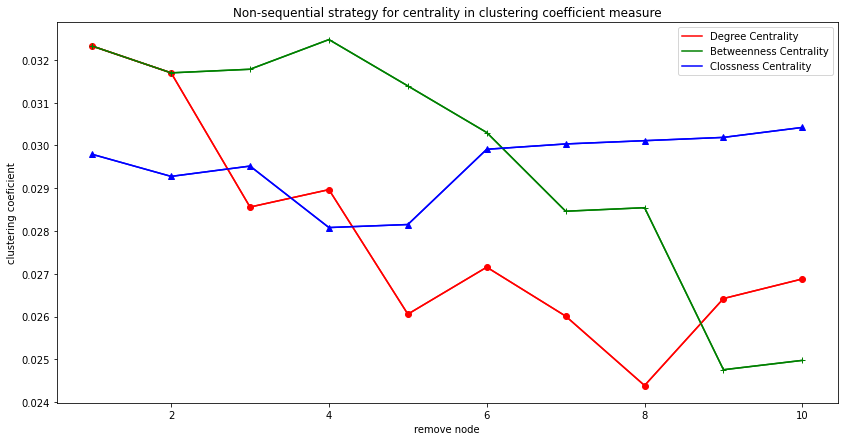

In [45]:
plt.figure(figsize=(14,7))
x = [1,2,3,4,5,6,7,8,9,10]#点的横坐标
y1=[0.03232189973614774,0.031695641219450725,0.02855879752431474,0.028966131907308353,
    0.026055705300988295,0.02715355805243443,0.02600938967136148,0.02438794726930319,
    0.026420454545454528,0.02687861271676299]
y2=[0.03232189973614774,0.031695641219450725,0.03177971453833521,0.03247336670517262,
    0.03138996138996138,0.030300683959220535,0.028461326727222663,0.028543823326432002,
    0.024756335282651063,0.02497541789577187]
y3=[0.029791666666666657,0.029275569877073627,0.02951663077291217,0.028079644956219254,
    0.02815055315055314,0.02990958408679927,0.030033840947546523,0.030110262934690407,
    0.030187074829931965,0.030419880034275915]
l1=plt.plot(x,y1,'r',label='Degree Centrality')
l2=plt.plot(x,y2,'g',label='Betweenness Centrality')
l3=plt.plot(x,y3,'b',label='Clossness Centrality')
plt.plot(x,y1,'ro-',x,y2,'g+-',x,y3,'b^-')
plt.title('Non-sequential strategy for centrality in clustering coefficient measure')
plt.xlabel('remove node')
plt.ylabel('clustering coeficient')
plt.legend()
plt.savefig('Non-sequential strategy for centrality in clustering coeficient measure.jpg')

#### Non-Sequential & Average shortest path

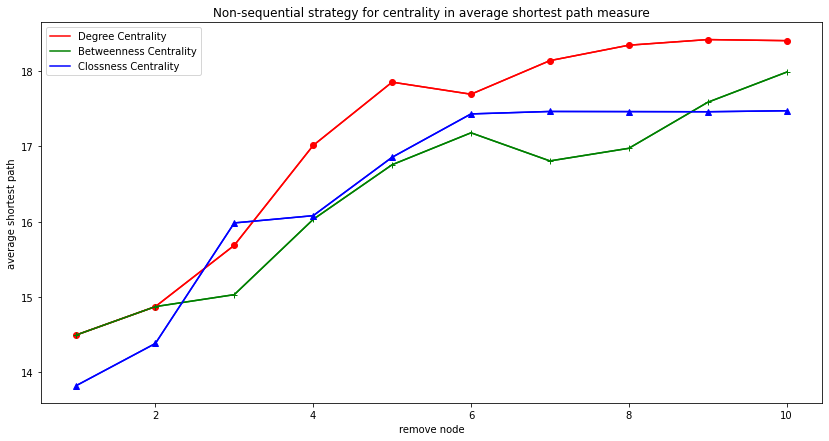

In [46]:
plt.figure(figsize=(14,7))
x = [1,2,3,4,5,6,7,8,9,10]#点的横坐标
y1=[14.496447069006436,14.872496596634528,15.686438286585021,17.013376152313228,
    17.853835506665696,17.69335337869916,18.139508235855814,18.344520734303227,
    18.419159544159545,18.40477506911284]
y2=[14.496447069006436,14.872496596634528,15.03120943619843,16.030742332629124,
    16.75674210796162,17.18086485212678,16.80737203652509,16.97505898213684,
    17.5863387697004,17.986978757571]
y3=[13.82453634085213,14.382728177226987,15.983772768122737,16.080248327099714,
    16.855721774709117,17.43183190901497,17.464266800997144,17.462494157968532,
    17.460527689336605,17.47392203111335]
l1=plt.plot(x,y1,'r',label='Degree Centrality')
l2=plt.plot(x,y2,'g',label='Betweenness Centrality')
l3=plt.plot(x,y3,'b',label='Clossness Centrality')
plt.plot(x,y1,'ro-',x,y2,'g+-',x,y3,'b^-')
plt.title('Non-sequential strategy for centrality in average shortest path measure')
plt.xlabel('remove node')
plt.ylabel('average shortest path')
plt.legend()
plt.savefig('Non-sequential strategy for centrality in average shortest path measure.jpg')

#### Sequential & Coeficient

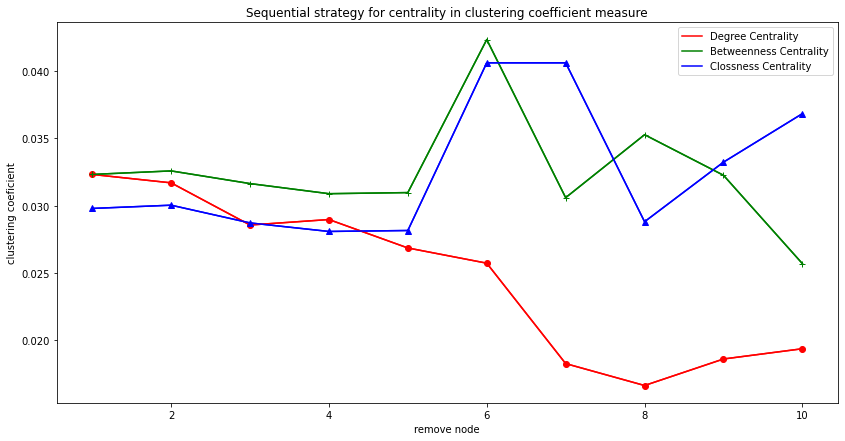

In [47]:
plt.figure(figsize=(14,7))
x = [1,2,3,4,5,6,7,8,9,10]#点的横坐标
y1=[0.03232189973614774,0.031695641219450725,0.02855879752431474,0.028966131907308353,
    0.026851851851851825,0.025719591457752995,0.018249534450651767,0.01661998132586368,
    0.018591549295774647,0.019354838709677417]
y2=[0.03232189973614774,0.0325837742504409,0.03164077302008335,0.03088905775075986,
    0.030971428571428556,0.04235368156072999,0.030594184576485463,0.03527696793002916,
    0.0322598403523259,0.02568627450980393]
y3=[0.029791666666666657,0.030033416875522127,0.028715003589375437,0.028079644956219254,
    0.02815055315055314,0.04062368310155918,0.04062368310155918,0.0288042328042328,
    0.03323565323565323,0.0368433971526755]
l1=plt.plot(x,y1,'r',label='Degree Centrality')
l2=plt.plot(x,y2,'g',label='Betweenness Centrality')
l3=plt.plot(x,y3,'b',label='Clossness Centrality')
plt.plot(x,y1,'ro-',x,y2,'g+-',x,y3,'b^-')
plt.title('Sequential strategy for centrality in clustering coefficient measure')
plt.xlabel('remove node')
plt.ylabel('clustering coeficient')
plt.legend()
plt.savefig('Sequential strategy for centrality in clustering coefficient measure.jpg')

#### Sequential & Average shortest path

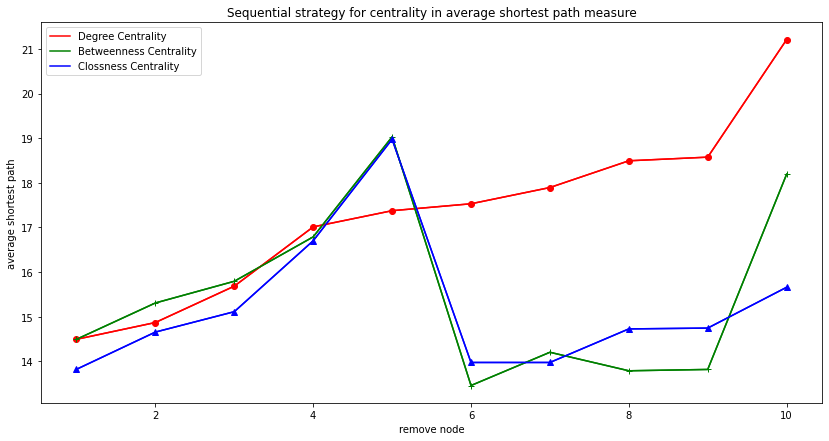

In [48]:
plt.figure(figsize=(14,7))
x = [1,2,3,4,5,6,7,8,9,10]#点的横坐标
y1=[14.496447069006436,14.872496596634528,15.686438286585021,17.013376152313228,
    17.37607551841535,17.531099733897697,17.894731076788258,18.493500771094954,
    18.5749661812684,21.207348628601]
y2=[14.496447069006436,15.31013431013431,15.795939387098596,16.789631205673757,
    19.02923351158645,13.4623601419048,14.20645034414946,13.792046049188906,
    13.821884661916924,18.193595544726765]
y3=[13.82453634085213,14.65848037178373,15.11481842461678,16.70242729562629,
    18.974696330392533,13.978013765978368,13.978013765978368,14.729722222222222,
    14.747607718741738,15.661877036483094]
l1=plt.plot(x,y1,'r',label='Degree Centrality')
l2=plt.plot(x,y2,'g',label='Betweenness Centrality')
l3=plt.plot(x,y3,'b',label='Clossness Centrality')
plt.plot(x,y1,'ro-',x,y2,'g+-',x,y3,'b^-')
plt.title('Sequential strategy for centrality in average shortest path measure')
plt.xlabel('remove node')
plt.ylabel('average shortest path')
plt.legend()
plt.savefig('Sequential strategy for centrality in average shortest path measure.jpg')

# 2 Flows: weighted network

## 2.1 Consider the centrality measure derived in I.- indicating the most relevant stations for assessing the vulnerability of the underground. 

In [49]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:
b_w={}
for e1, e2, flow in G.edges(data='flows'):
    if flow ==0:
        flow = 0.000000001
        print(flow)
    else:
        flow==flow
    flow=1/flow
    b_w[e1,e2] =flow
nx.set_edge_attributes(G,b_w,'flow_b')

1e-09
1e-09
1e-09


### 2.1.1 Degree centrality - can't be calculated

### 2.1.2 Tropological betweenness centrality

In [50]:
### Weighted betweenness centrality:
bet_london_w=nx.betweenness_centrality(G,weight='flow_b',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [51]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted_bw = df.sort_values(["betweenness_w"], ascending=False)
df_sorted_bw[0:10]

,betweenness_w
Green Park,45690.0
Bank and Monument,40322.0
Waterloo,33231.0
Westminster,30433.0
Liverpool Street,26878.0
Stratford,26437.0
Bond Street,23288.0
Euston,22682.0
Oxford Circus,21607.0
Warren Street,20292.0


### 2.1.1 Tropological closeness centrality

In [52]:
### Weighted betweenness centrality:
clo_w=nx.closeness_centrality(G,distance='flow_b')

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clo_w,'clo_w')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['clo_w'] = pd.Series(nx.get_node_attributes(G, 'clo_w'))

df_sorted_cw = df.sort_values(["clo_w"], ascending=False)
df_sorted_cw[0:10]

,clo_w
Green Park,1.000000e-07
Westminster,1.000000e-07
Waterloo,1.000000e-07
Bank and Monument,1.000000e-07
Oxford Circus,1.000000e-07
Bond Street,1.000000e-07
Victoria,1.000000e-07
Liverpool Street,1.000000e-07
Warren Street,1.000000e-07
Moorgate,1.000000e-07


## 2.2 the measure for a weighted network. 

## 2.3 the measure for a weighted network ——  Betweenness

### 2.3.1 Original_zero remove-unweighted

#### Clustering coefficient

In [53]:
clus_o = nx.average_clustering(G)
print(clus_o)

0.030382377389858693


#### Efficiency

In [54]:
e_o = nx.global_efficiency(G)
print(e_o)

0.1012561935972123


### 2.3.2 Unweighted

#### Clustering coefficient

In [55]:
clus_u = nx.average_clustering(largest_subgraph_gbn1)
print(clus_u)

0.02288288288288288


#### Efficiency

In [56]:
e_u = nx.global_efficiency(largest_subgraph_gbn1)
print(e_u)

0.06963586197430416


### 2.3.3 Weighted_sequential

In [57]:
G_w = copy.deepcopy(G)

In [58]:
# 10 highest values:
# List of nodes:
bw_values_sorted = sorted(bet_london_w.items(), key=itemgetter(1), reverse=True)
bw_ten=[e for e,v in bw_values_sorted[:10]]
bw_ten

['Green Park',
 'Bank and Monument',
 'Waterloo',
 'Westminster',
 'Liverpool Street',
 'Stratford',
 'Bond Street',
 'Euston',
 'Oxford Circus',
 'Warren Street']

In [59]:
# remove the highest node
G_w.remove_nodes_from(bw_ten[0:1:1])

#### Clustering coefficient

In [60]:
clus_w = nx.average_clustering(G_w)
print(clus_w)

0.02979166666666667


#### Efficiency

In [61]:
e_w = nx.global_efficiency(G_w)
print(e_w)

0.09918991960788402


### 2.3.4 Plot

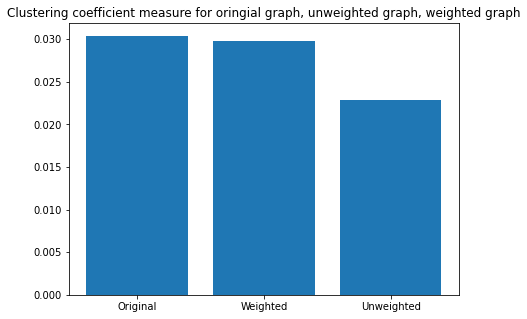

<Figure size 432x288 with 0 Axes>

In [62]:
# clustering coefficient
plt.figure(figsize=(7,5))
x = ('Original', 'Weighted', 'Unweighted')
y = [clus_o,clus_w,clus_u]
plt.bar(x, y)
plt.title('Clustering coefficient measure for oringial graph, unweighted graph, weighted graph')
plt.show()
plt.savefig('Clustering coefficient measure for oringial graph, unweighted graph, weighted graph')

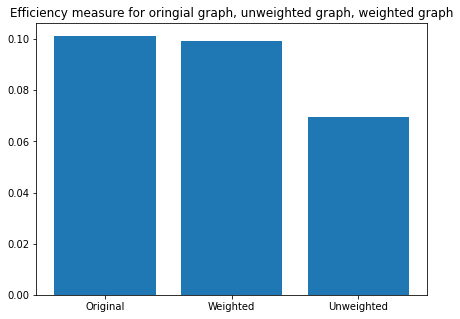

<Figure size 432x288 with 0 Axes>

In [63]:
# efficiency
plt.figure(figsize=(7,5))
x = ('Original', 'Weighted', 'Unweighted')
y = [e_o,e_w,e_u]
plt.bar(x, y)
plt.title('Efficiency measure for oringial graph, unweighted graph, weighted graph')
plt.show()
plt.savefig('Efficiency coefficient measure for oringial graph, unweighted graph, weighted graph')

# 2 Spatial Interaction models

## 3 Models and calibration

### 3.1 Brief introduction to the spatial models

### 3.2 Selection of model

In [64]:
# 选择 production-constrained

In [65]:
fdata = pd.read_csv("london_flows.csv")

In [66]:
import numpy as np
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
fdatasubmat = pd.pivot_table(fdata, values ="flows", index="station_destination", columns = "station_origin",
                            aggfunc=np.sum, margins=True)
fdatasubmat

station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_destination,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,345
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,750
Acton Town,NaN,NaN,NaN,0.0,2.0,NaN,95.0,2.0,NaN,4.0,...,43.0,0.0,20.0,1.0,NaN,2.0,NaN,1.0,NaN,2202
Aldgate,NaN,NaN,3.0,NaN,0.0,NaN,NaN,41.0,NaN,29.0,...,0.0,NaN,62.0,4.0,NaN,5.0,NaN,26.0,NaN,7782
Aldgate East,NaN,NaN,17.0,0.0,NaN,NaN,3.0,0.0,NaN,11.0,...,45.0,10.0,20.0,8.0,NaN,47.0,NaN,11.0,NaN,7932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,706
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242
Woodside Park,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,16.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,745


In [67]:
fdatasubmat[50:70]

station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_destination,,,,,,,,,,,,,,,,,,,,,
Caledonian Road & Barnsbury,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1668
Cambridge Heath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,458
Camden Road,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,3784
Camden Town,NaN,NaN,3.0,8.0,16.0,NaN,0.0,1.0,NaN,74.0,...,0.0,2.0,26.0,0.0,NaN,4.0,NaN,97.0,NaN,6348
Canada Water,NaN,0.0,11.0,0.0,0.0,NaN,2.0,2.0,245.0,11.0,...,0.0,0.0,4.0,0.0,NaN,18.0,NaN,1.0,NaN,20443
Canary Wharf,1.0,NaN,57.0,1.0,3.0,67.0,7.0,54.0,NaN,96.0,...,1.0,27.0,64.0,0.0,NaN,192.0,NaN,42.0,82.0,58772
Canning Town,37.0,NaN,3.0,0.0,5.0,9.0,4.0,3.0,NaN,8.0,...,0.0,0.0,15.0,0.0,NaN,56.0,NaN,1.0,1425.0,15428
Cannon Street,NaN,NaN,18.0,4.0,85.0,NaN,1.0,2.0,NaN,1.0,...,26.0,17.0,1.0,0.0,NaN,1.0,NaN,3.0,NaN,4698
Canonbury,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,846


In [68]:
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt

In [69]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [70]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [71]:
#fdata.flows[fdata.flows == 0] = 0.1

In [72]:
fdata.head(10)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560
6,Abbey Road,Custom House,0,599,845,3824.855630
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909
8,Abbey Road,Cyprus,7,599,850,6532.099618
9,Abbey Road,Devons Road,1,599,611,3958.324171


In [73]:
fdata.dropna

<bound method DataFrame.dropna of          station_origin station_destination  flows  population   jobs  \
0            Abbey Road   Bank and Monument      0         599  78549   
1            Abbey Road             Beckton      1         599    442   
2            Abbey Road           Blackwall      3         599    665   
3            Abbey Road        Canary Wharf      1         599  58772   
4            Abbey Road        Canning Town     37         599  15428   
...                 ...                 ...    ...         ...    ...   
61469  Woolwich Arsenal       Tower Gateway    127        7892   3342   
61470  Woolwich Arsenal            West Ham    608        7892   5487   
61471  Woolwich Arsenal     West India Quay      6        7892    400   
61472  Woolwich Arsenal     West Silvertown     81        7892    893   
61473  Woolwich Arsenal           Westferry     76        7892   1250   

           distance  
0       8131.525097  
1       8510.121774  
2       3775.448872  
3

In [74]:
#take the variables and produce logarithms of them
x_variables = ["jobs", "distance"]
log_x_vars = []
for x in x_variables:
    fdata[f"log_{x}"] = np.log(fdata[x])
    log_x_vars.append(f"log_{x}")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
fdata

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274
...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,9.503144
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,9.071245
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,9.162905
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,8.585832


In [76]:
fdata.replace([np.inf, -np.inf], np.nan, inplace=True)

In [77]:
fdata.dropna(inplace=True)

In [78]:
fdata.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096721,8.807842
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739337,8.249276
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,9.048280
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745236,8.784484
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415097,8.283576


In [79]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=fdata, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61436
Model:                            GLM   Df Residuals:                    61035
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Wed, 04 May 2022   Deviance:                   1.8615e+06
Time:                        20:55:02   Pearson chi2:                 2.78e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [80]:
#print out the new values
prodSim.params

station_origin[Abbey Road]          3.250242
station_origin[Acton Central]       5.016902
station_origin[Acton Town]          4.562892
station_origin[Aldgate]             3.323767
station_origin[Aldgate East]        3.457664
                                      ...   
station_origin[Woodgrange Park]     5.254667
station_origin[Woodside Park]       4.698635
station_origin[Woolwich Arsenal]    6.905590
log_jobs                            0.768616
log_distance                       -0.878119
Length: 401, dtype: float64

In [81]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(fdata.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
fdata = fdata.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(fdata.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
fdata = fdata.merge(D_j, on = "station_destination", how = "left" )

In [82]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
fdata = fdata.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
fdata.drop(columns = ["coef"], inplace = True)
#check this has worked
fdata.head()

<ipython-input-82-eff04fa07630>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,3.250242
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,3.250242
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,3.250242
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,3.250242


In [83]:
alpha_i = prodSim.params[0:399]
gamma = prodSim.params[399]
beta = -prodSim.params[400]

In [84]:
# print('alpha=',alpha_i)
print('gamma=',gamma)
print('beta=',beta)

gamma= 0.7686156200124394
beta= 0.878119118372431


In [85]:
fdata["prodsimest1"] = np.exp(fdata["alpha_i"]+gamma*fdata["log_jobs"] 
                                 - beta*fdata["log_distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
fdata.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,3.250242,55.010681
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,3.250242,0.986106
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,3.250242,2.755640
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,3.250242,66.457296
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,3.250242,49.060970
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096721,8.807842,599,1208,3.250242,2.639418
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739337,8.249276,599,845,3.250242,3.275120
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,9.048280,599,1748,3.250242,2.838948
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745236,8.784484,599,850,3.250242,2.056310
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415097,8.283576,599,611,3.250242,2.476929


In [86]:
#first round the estimates
fdata["prodsimest1"] = round(fdata["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
fdatamat1 = fdata.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
fdatamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [87]:
# Create graph object
O = nx.from_pandas_edgelist(fdata, 'station_origin', 'station_destination','prodsimest1')

Oe_val=[(i[2]['prodsimest1']) for i in O.edges(data=True)]

Oe_color=[(i[2]['prodsimest1']/max(Oe_val)) for i in O.edges(data=True)]
Oe_width=[(i[2]['prodsimest1']/max(Oe_val)*5) for i in O.edges(data=True)]
Oe_alpha=[(i[2]['prodsimest1']/max(Oe_val)) for i in O.edges(data=True)]

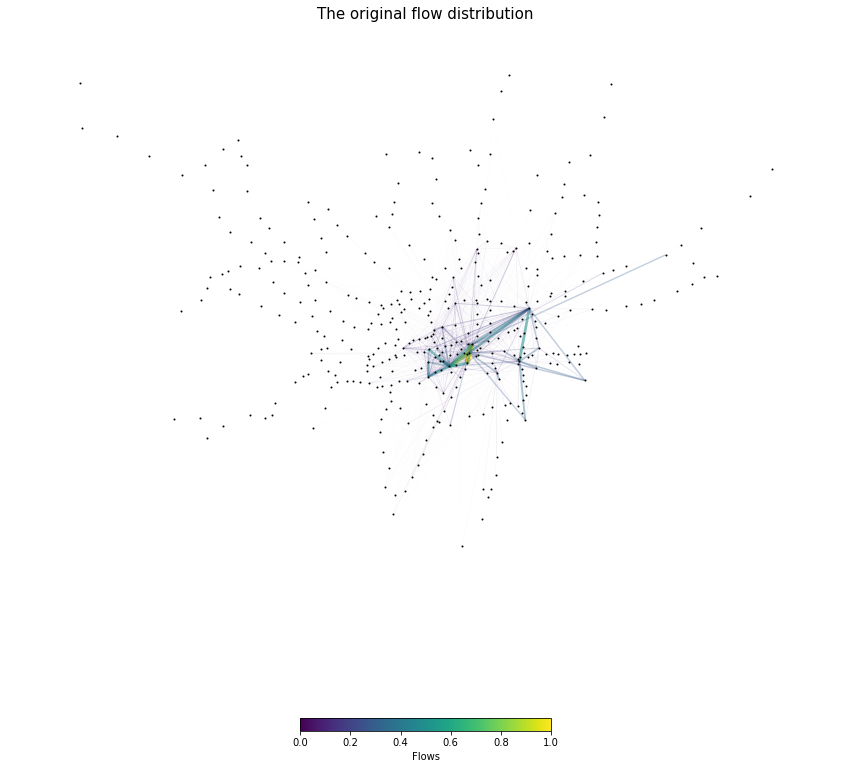

<Figure size 432x288 with 0 Axes>

In [88]:
# Plot graph
fig, ax = plt.subplots(figsize=(15,15))

#pos=nx.spring_layout(X)
Oedg=nx.draw_networkx_edges(O, pos,edge_color=Oe_color, width=Oe_width, alpha=Oe_alpha)

nx.draw_networkx_nodes(O,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.axis("off")
plt.title("The original flow distribution",fontsize=15)
plt.colorbar(Oedg,label="Flows",orientation="horizontal", shrink=0.3)
plt.show()
plt.savefig('The original flow distribution')

In [89]:
CalcRSquared(fdata["flows"], fdata["prodsimest1"])

0.38828472682918785

In [90]:
CalcRMSE(fdata["flows"], fdata["prodsimest1"])

102.873

## 4 Scenarios

### 4.1 Scenario A

In [91]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = float(row["jobs"]) *0.5
    else:
        val = row["jobs"]
    return val
        
fdata["jobs_a"] = fdata.apply(new_sal, axis =1)
fdata.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,jobs_a
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,3.250242,55.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,3.250242,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,3.250242,3.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,3.250242,66.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,3.250242,49.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,7.096721,8.807842,599,1208,3.250242,3.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.739337,8.249276,599,845,3.250242,3.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,7.466228,9.048280,599,1748,3.250242,3.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.745236,8.784484,599,850,3.250242,2.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.415097,8.283576,599,611,3.250242,2.0,611.0


In [92]:
fdata["prodsimest2"] = np.exp(fdata["alpha_i"]+gamma*np.log(fdata["jobs_a"]) - beta*fdata["log_distance"])

fdata["prodsimest2"] = round(fdata["prodsimest2"],0)
#now we can convert the pivot table into a matrix
fdatamat2 = fdata.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
fdatamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,572.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3719.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2859.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4790.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3060.0


In [93]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = fdata["jobs_a"]**gamma
dist_beta = fdata["distance"]**beta
#calcualte the first stage of the Ai values
fdata["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(fdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
fdata = fdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [94]:
#to check everything works, recreate the original estimates
fdata["prodsimest3"] = fdata["A_i"]*fdata["O_i"]*Dj2_gamma*dist_beta
#round
fdata["prodsimest3"] = round(fdata["prodsimest3"])
#check
fdata[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,55.0,236.0
1,1.0,5.0
2,3.0,3.0
3,66.0,73.0
4,49.0,22.0
...,...,...
61431,121.0,203.0
61432,259.0,204.0
61433,32.0,30.0
61434,98.0,33.0


In [95]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = fdata["jobs_a"]**gamma
#calcualte the first stage of the Ai values
fdata["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(fdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
fdata = fdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [96]:
#to check everything works, recreate the original estimates
fdata["prodsimest4"] = fdata["A_i2"]*fdata["O_i"]*Dj3_gamma*dist_beta
#round
fdata["prodsimest4"] = round(fdata["prodsimest4"])

In [97]:
fdatasubmat5 = fdata.pivot_table(values ="prodsimest4", index="station_destination", columns = "station_origin",
                            aggfunc=np.sum, margins=True)
fdatasubmat5

station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_destination,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,227.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,756.0
Acton Town,NaN,NaN,NaN,14.0,15.0,NaN,1.0,3.0,NaN,19.0,...,15.0,4.0,24.0,2.0,NaN,18.0,NaN,11.0,NaN,4360.0
Aldgate,NaN,NaN,27.0,NaN,5.0,NaN,NaN,9.0,NaN,14.0,...,48.0,NaN,37.0,9.0,NaN,26.0,NaN,20.0,NaN,6141.0
Aldgate East,NaN,NaN,28.0,4.0,NaN,NaN,14.0,9.0,NaN,15.0,...,49.0,14.0,38.0,9.0,NaN,24.0,NaN,21.0,NaN,6537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,5.0,5.0,NaN,NaN,NaN,NaN,9.0,...,12.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2067.0
Woodgrange Park,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0
Woodside Park,NaN,NaN,7.0,6.0,7.0,NaN,NaN,NaN,NaN,8.0,...,11.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2006.0


In [98]:
# Create graph object
A = nx.from_pandas_edgelist(fdata, 'station_origin', 'station_destination','prodsimest4')

Ae_val=[(i[2]['prodsimest4']) for i in A.edges(data=True)]

Ae_color=[(i[2]['prodsimest4']/max(Ae_val)) for i in A.edges(data=True)]
Ae_width=[(i[2]['prodsimest4']/max(Ae_val)*5) for i in A.edges(data=True)]
Ae_alpha=[(i[2]['prodsimest4']/max(Ae_val)) for i in A.edges(data=True)]

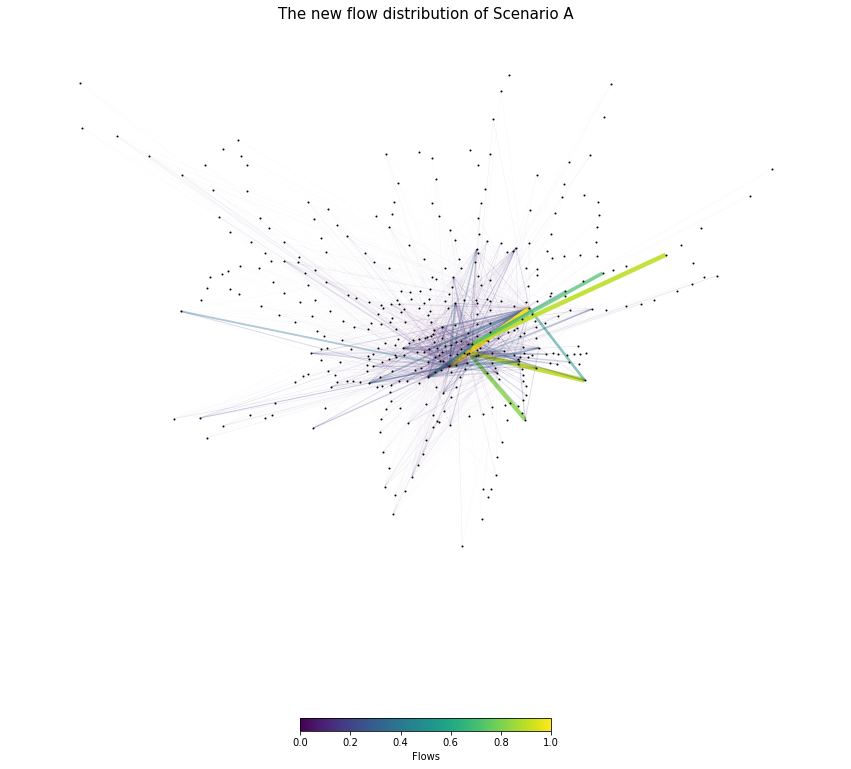

<Figure size 432x288 with 0 Axes>

In [99]:
# Plot graph
fig, ax = plt.subplots(figsize=(15,15))

#pos=nx.spring_layout(X)
Aedg=nx.draw_networkx_edges(A, pos,edge_color=Ae_color, width=Ae_width, alpha=Ae_alpha)

nx.draw_networkx_nodes(A,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.axis("off")
plt.title("The new flow distribution of Scenario A",fontsize=15)
plt.colorbar(Aedg,label="Flows",orientation="horizontal", shrink=0.3)
plt.show()
plt.savefig('The new flow distribution of Scenario A')

In [100]:
CalcRSquared(fdata["prodsimest1"], fdata["prodsimest3"])

0.33778445745760166

In [101]:
CalcRMSE(fdata["flows"], fdata["prodsimest1"])

102.873

### 4.1 Scenario B

### distance decay parameter

#### The challenge to complete is to run every possible model (unconstrained, production constrained, attraction constrained and doubly constrained) with each distance decay function (power, exponential) on the total dataset and to extract each models paramaters, along with each models performance metrics ( 𝑅2 ,  𝑅𝑀𝑆𝐸 ).

In [102]:
#create the formula (the "-1" indicates no intercept in the regression model).
fdata_form = 'flows ~ station_origin + log_jobs + distance-1'
#run a production constrained sim
fdatasim1 = smf.glm(formula=fdata_form, data = fdata, family = sm.families.Poisson()).fit()
print(fdatasim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61436
Model:                            GLM   Df Residuals:                    61035
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Wed, 04 May 2022   Deviance:                   1.6477e+06
Time:                        20:57:46   Pearson chi2:                 2.40e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [103]:
alpha_i2 =fdatasim1.params[0:399]
gamma2 = fdatasim1.params[-2]

In [104]:
#We can do this by pulling out the parameter values
coefs2 = pd.DataFrame(fdatasim1.params)
coefs2.reset_index(inplace=True)
coefs2.rename(columns = {0:"alpha_i2", "index":"coef"}, inplace = True)
to_repl2 = ["(station_origin)", "\[", "\]"]
for x in to_repl2:
    coefs2["coef"] = coefs2["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
fdata = fdata.merge(coefs2, left_on="station_origin", right_on="coef", how = "left")
fdata.drop(columns = ["coef"], inplace = True)
#check this has worked
fdata.sample(5)

<ipython-input-104-d35a7e884f37>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs2["coef"] = coefs2["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,jobs_a,prodsimest2,Ai1,A_i,prodsimest3,A_i2,prodsimest4,alpha_i2
33202,Maida Vale,Marylebone,36,2142,4250,3111.753130,8.354674,8.042942,2142,4250,3.624746,20.0,4250.0,20.0,7.179778e+05,2.159263e-09,3.0,2.159263e-09,3.0,-2.814910
7052,Brockley,Denmark Hill,2,2322,2612,8169.254105,7.867871,9.008133,2322,2612,5.771439,50.0,2612.0,50.0,1.152660e+06,1.531071e-08,41.0,1.531071e-08,41.0,-0.621726
30357,Knightsbridge,London Bridge,20,1125,29930,5392.759124,10.306617,8.592812,1125,29926,2.549937,19.0,29930.0,19.0,5.216511e+06,2.452438e-09,14.0,2.452438e-09,14.0,-3.872407
51225,Theydon Bois,Brixton,0,677,5084,32412.339251,8.533854,10.386294,677,5084,3.782351,3.0,5084.0,3.0,6.450427e+06,1.086813e-09,5.0,1.086813e-09,5.0,-1.147168
15836,East Putney,South Woodford,0,5448,766,27306.444618,6.641182,10.214878,5448,766,4.844341,3.0,766.0,3.0,1.295485e+06,1.601244e-09,11.0,1.601244e-09,11.0,-1.443282


In [105]:
beta2 = fdatasim1.params[-1]
print('beta2=',-beta2)

beta2= 0.00015316619346349036


In [106]:
fdata["doubsimfitted1"] = np.round(fdatasim1.mu,0)
fdatasubmat6 = fdata.pivot_table(values ="doubsimfitted1", index="station_destination", columns ="station_origin",
                                    aggfunc=np.sum, margins=True)
fdatasubmat6

station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_destination,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,392.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,359.0
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,30.0,3.0,NaN,2.0,...,19.0,5.0,3.0,5.0,NaN,1.0,NaN,2.0,NaN,2161.0
Aldgate,NaN,NaN,13.0,NaN,40.0,NaN,NaN,2.0,NaN,38.0,...,29.0,NaN,43.0,5.0,NaN,41.0,NaN,19.0,NaN,8549.0
Aldgate East,NaN,NaN,13.0,37.0,NaN,NaN,6.0,2.0,NaN,37.0,...,28.0,7.0,42.0,5.0,NaN,52.0,NaN,19.0,NaN,9502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,660.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0
Woodside Park,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,422.0


In [107]:
# Create graph object
B1 = nx.from_pandas_edgelist(fdata, 'station_origin', 'station_destination','doubsimfitted1')

B1e_val=[(i[2]['doubsimfitted1']) for i in B1.edges(data=True)]

B1e_color=[(i[2]['doubsimfitted1']/max(B1e_val)) for i in B1.edges(data=True)]
B1e_width=[(i[2]['doubsimfitted1']/max(B1e_val)*8) for i in B1.edges(data=True)]
B1e_alpha=[(i[2]['doubsimfitted1']/max(B1e_val)) for i in B1.edges(data=True)]

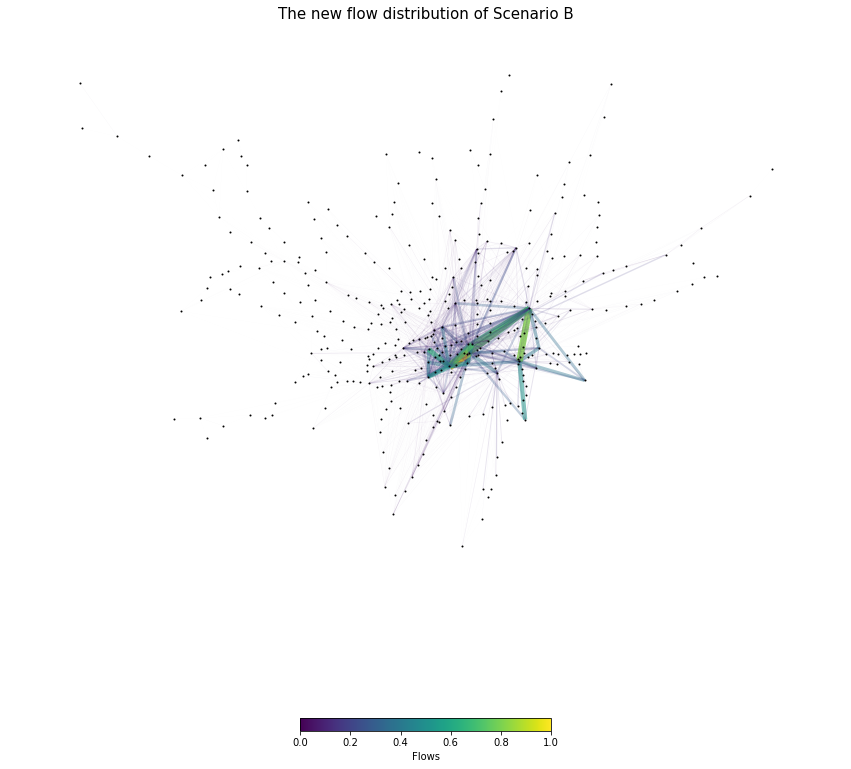

<Figure size 432x288 with 0 Axes>

In [108]:
# Plot graph
fig, ax = plt.subplots(figsize=(15,15))

#pos=nx.spring_layout(X)
B1edg=nx.draw_networkx_edges(B1, pos,edge_color=B1e_color, width=B1e_width, alpha=B1e_alpha)

nx.draw_networkx_nodes(B1,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.axis("off")
plt.title("The new flow distribution of Scenario B",fontsize=15)
plt.colorbar(B1edg,label="Flows",orientation="horizontal", shrink=0.3)
plt.show()
plt.savefig('The new flow distribution of Scenario B')

In [109]:
CalcRSquared(fdata["flows"],fdata["doubsimfitted1"])

0.4680719653270651

In [110]:
CalcRMSE(fdata["flows"],fdata["doubsimfitted1"])

96.245

#### change  parameter

In [111]:
fdata['distance2']=fdata['distance']*2

In [112]:
fdata["prodsimest6"] = np.exp(fdata["alpha_i2"]+gamma2*np.log(fdata["jobs"]) - beta2*fdata["distance2"])

fdata["prodsimest6"] = round(fdata["prodsimest6"],0)
#now we can convert the pivot table into a matrix
fdatamat6 = fdata.pivot_table(values ="prodsimest6", index="station_destination", columns ="station_origin",
                            aggfunc=np.sum, margins=True)
fdatamat6

station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_destination,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2346.0,8.605000e+03
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,216427.0,NaN,NaN,2.485856e+06
Acton Town,NaN,NaN,NaN,3167.0,3725.0,NaN,294.0,8.754445e+07,NaN,3148.0,...,25194.0,2921.0,134685.0,95.0,NaN,2.778826e+06,NaN,315675.0,NaN,9.064392e+08
Aldgate,NaN,NaN,31067.0,NaN,78.0,NaN,NaN,2.460865e+09,NaN,193.0,...,184853.0,NaN,14442.0,1580.0,NaN,5.819000e+04,NaN,55924.0,NaN,1.078131e+10
Aldgate East,NaN,NaN,33944.0,72.0,NaN,NaN,149449.0,2.690185e+09,NaN,211.0,...,201971.0,23417.0,15787.0,1727.0,NaN,3.802000e+04,NaN,61136.0,NaN,1.105537e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,441969.0,943.0,664.0,NaN,NaN,NaN,NaN,2635.0,...,2629800.0,NaN,45606.0,NaN,NaN,NaN,NaN,NaN,NaN,7.522409e+08
Woodgrange Park,NaN,70621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.650202e+06
Woodside Park,NaN,NaN,87556.0,1581.0,1861.0,NaN,NaN,NaN,NaN,899.0,...,520976.0,NaN,38484.0,NaN,NaN,NaN,NaN,NaN,NaN,1.873860e+08


In [113]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = fdata["jobs"]**gamma2
dist_beta2 = fdata["distance2"]**beta2
#calcualte the first stage of the Ai values
fdata["Ai3"] = Dj3_gamma * dist_beta2
#now do the sum over all js bit
A_i3 = pd.DataFrame(fdata.groupby(["station_origin"])["Ai3"].agg(np.sum))
#now divide into 1
A_i3["Ai3"] = 1/A_i3["Ai3"]
A_i3.rename(columns={"Ai3":"A_i3"}, inplace=True)
#and write the A_i values back into the dataframe
fdata = fdata.merge(A_i3, left_on="station_origin", right_index=True, how="left")

In [114]:
#to check everything works, recreate the original estimates
fdata["prodsimest7"] = fdata["A_i3"]*fdata["O_i"]*Dj3_gamma*dist_beta2
#round
fdata["prodsimest7"] = round(fdata["prodsimest7"])

In [115]:
fdata

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,...,prodsimest3,A_i2,prodsimest4,alpha_i2,doubsimfitted1,distance2,prodsimest6,Ai3,A_i3,prodsimest7
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,11.271478,9.003504,599,78549,...,236.0,2.506043e-08,236.0,-2.914322,78.0,16263.050194,3259.0,4969.021742,0.000046,137.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.091310,9.049012,599,442,...,5.0,2.506043e-08,5.0,-2.914322,1.0,17020.243548,73.0,99.364664,0.000046,3.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.499787,8.236275,599,665,...,3.0,2.506043e-08,3.0,-2.914322,4.0,7550.897744,23.0,135.288808,0.000046,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,10.981421,8.534348,599,58772,...,73.0,2.506043e-08,73.0,-2.914322,99.0,10173.028439,1030.0,3991.780914,0.000046,110.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.643939,7.709274,599,15428,...,22.0,2.506043e-08,22.0,-2.914322,56.0,4457.846335,156.0,1453.928112,0.000046,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61431,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.114325,9.503144,7892,3342,...,203.0,1.197522e-08,203.0,0.518041,99.0,26803.591098,46703.0,457.854514,0.000044,160.0
61432,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.610137,9.071245,7892,5487,...,204.0,1.197522e-08,204.0,0.518041,295.0,17402.908722,16093.0,665.850872,0.000044,232.0
61433,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,5.991465,9.162905,7892,400,...,30.0,1.197522e-08,30.0,0.518041,36.0,19073.440902,2877.0,92.145953,0.000044,32.0
61434,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,6.794587,8.585832,7892,893,...,33.0,1.197522e-08,33.0,0.518041,125.0,10710.497108,1465.0,169.016654,0.000044,59.0


In [116]:
fdatasubmat7 = fdata.pivot_table(values ="prodsimest7", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
fdatasubmat7

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1222.0
Acton Town,NaN,NaN,NaN,24.0,24.0,NaN,4.0,2.0,NaN,25.0,...,20.0,3.0,9.0,7.0,NaN,4.0,NaN,4.0,NaN,3746.0
Aldgate,NaN,NaN,7.0,NaN,18.0,NaN,NaN,1.0,NaN,19.0,...,15.0,NaN,7.0,5.0,NaN,3.0,NaN,3.0,NaN,2877.0
Aldgate East,NaN,NaN,8.0,20.0,NaN,NaN,3.0,1.0,NaN,20.0,...,17.0,3.0,7.0,6.0,NaN,3.0,NaN,3.0,NaN,3176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,12.0,32.0,32.0,NaN,NaN,NaN,NaN,33.0,...,27.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,4869.0
Woodgrange Park,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,8.0,21.0,21.0,NaN,4.0,NaN,NaN,22.0,...,18.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3095.0


In [117]:
# Create graph object
B2 = nx.from_pandas_edgelist(fdata, 'station_origin', 'station_destination','prodsimest7')

B2e_val=[(i[2]['prodsimest7']) for i in B2.edges(data=True)]

B2e_color=[(i[2]['prodsimest7']/max(B2e_val)) for i in B2.edges(data=True)]
B2e_width=[(i[2]['prodsimest7']/max(B2e_val)*8) for i in B2.edges(data=True)]
B2e_alpha=[(i[2]['prodsimest7']/max(B2e_val)) for i in B2.edges(data=True)]

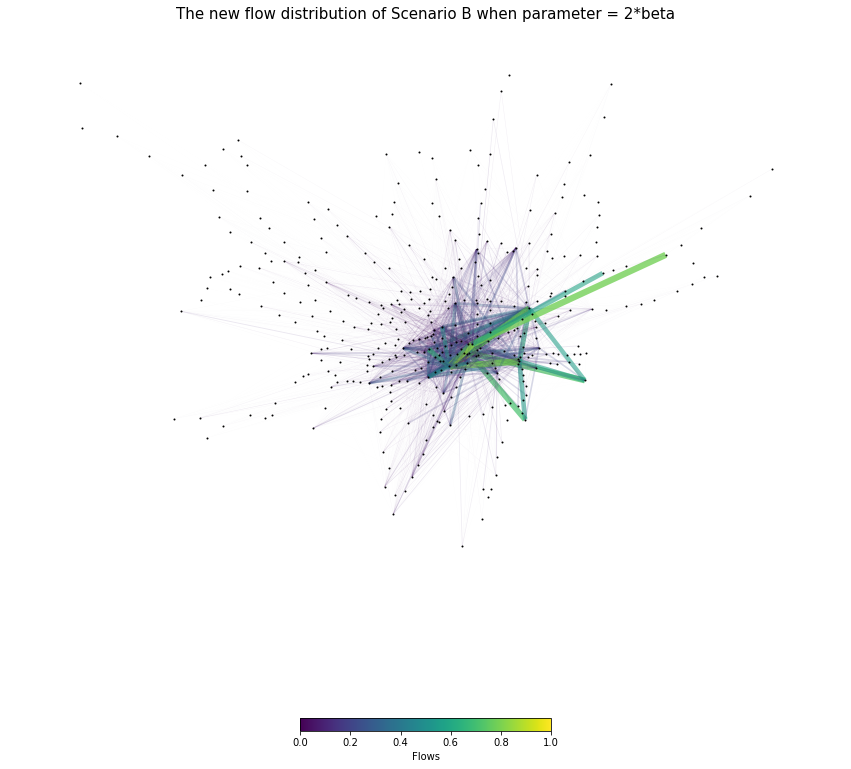

<Figure size 432x288 with 0 Axes>

In [118]:
# Plot graph
fig, ax = plt.subplots(figsize=(15,15))

#pos=nx.spring_layout(X)
B2edg=nx.draw_networkx_edges(B2, pos,edge_color=B2e_color, width=B2e_width, alpha=B2e_alpha)

nx.draw_networkx_nodes(B2,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.axis("off")
plt.title("The new flow distribution of Scenario B when parameter = 2*beta",fontsize=15)
plt.colorbar(B2edg,label="Flows",orientation="horizontal", shrink=0.3)
plt.show()
plt.savefig('The new flow distribution of Scenario B when parameter = 2*beta')